# Data Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from karpiu.simulation import make_mmm_daily_data, make_adstock_matrix
from karpiu.utils import insert_events

In [2]:
%load_ext autoreload
%autoreload 2

## Data Simulations

### Non-Seasonal

In [3]:
seed = 2022
n_steps = 365 * 3
channels_coef = [0.053, 0.08, 0.19, 0.125, 0.1]
channels = ["promo", "radio", "search", "social", "tv"]
features_loc = np.array([2000, 5000, 3850, 3000, 7500])
features_scale = np.array([550, 2500, 500, 1000, 3500])
scalability = np.array([3.0, 1.25, 0.8, 1.3, 1.5])
start_date = "2019-01-01"
adstock_args = {
    "n_steps": 28,
    "peak_step": np.array([3, 8, 2, 5, 10]),
    "left_growth": np.array([0.7, 0.8, 0.75, 0.5, 0.5]),
    "right_growth": np.array([-0.5, -0.3, -0.35, -0.3, -0.15]),
}
np.random.seed(seed)
df, scalability_df, adstock_df, event_cols = make_mmm_daily_data(
    channels_coef=channels_coef,
    channels=channels,
    features_loc=features_loc,
    features_scale=features_scale,
    scalability=scalability,
    n_steps=n_steps,
    start_date=start_date,
    adstock_args=adstock_args,
    country=None,
)

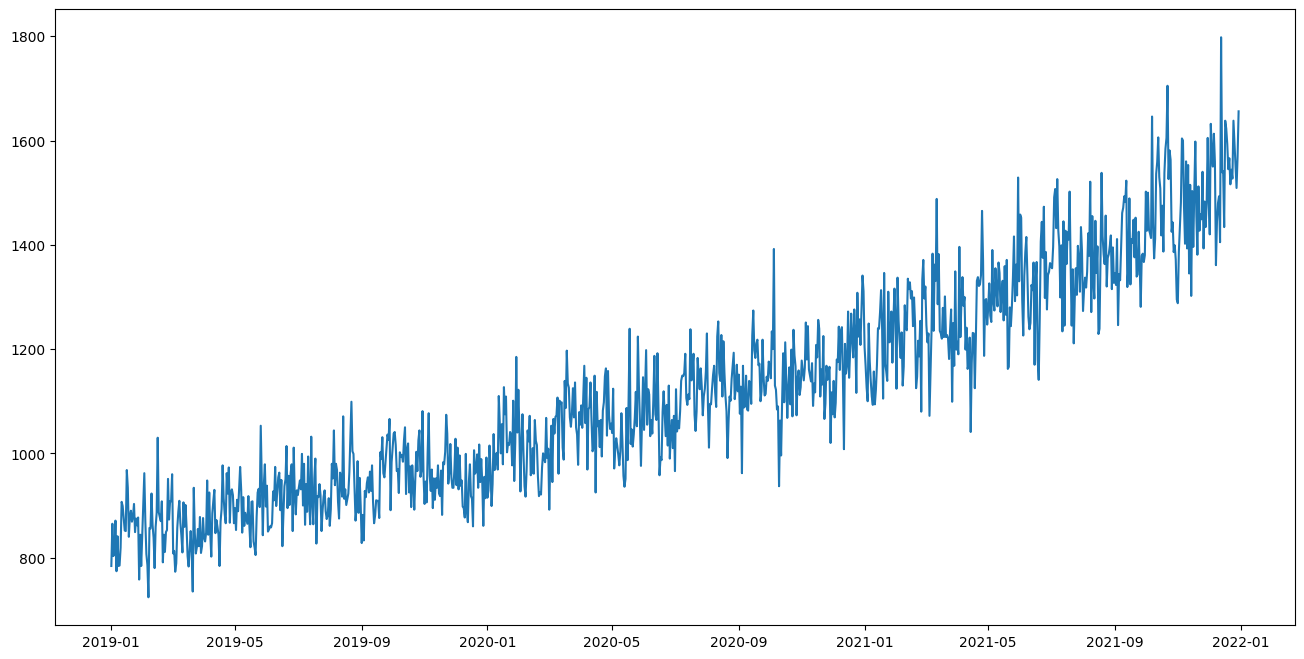

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(df["date"].values, df["sales"].values);

In [5]:
df.to_csv("resource/non-seasonal/df.csv", index=False)
scalability_df.to_csv("resource/non-seasonal/scalability_df.csv", index=False)
adstock_df.to_csv("resource/non-seasonal/adstock_df.csv")

### Seasonal

In [6]:
seed = 2023
np.random.seed(seed)
df, scalability_df, adstock_df, event_cols = make_mmm_daily_data(
    channels_coef=channels_coef,
    channels=channels,
    features_loc=features_loc,
    features_scale=features_scale,
    scalability=scalability,
    n_steps=n_steps,
    start_date=start_date,
    adstock_args=adstock_args,
    with_weekly_seasonality=True,
    with_yearly_seasonality=True,
    country="US",
)

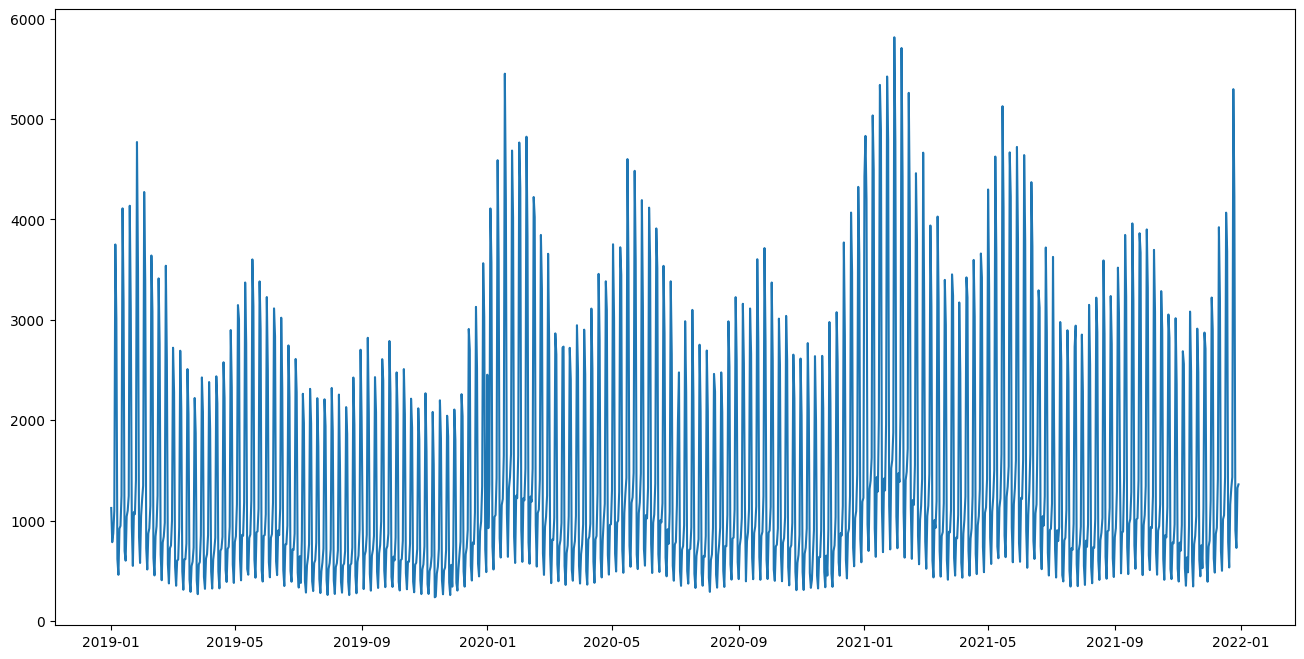

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(df["date"].values, df["sales"].values);

In [8]:
df.to_csv("resource/seasonal/df.csv", index=False)
scalability_df.to_csv("resource/seasonal/scalability_df.csv", index=False)
adstock_df.to_csv("resource/seasonal/adstock_df.csv")

## Utils

### Simulating Adstock Matrix

In [9]:
adstock_matrix = make_adstock_matrix(**adstock_args)

In [10]:
adstock_matrix.shape

(5, 28)

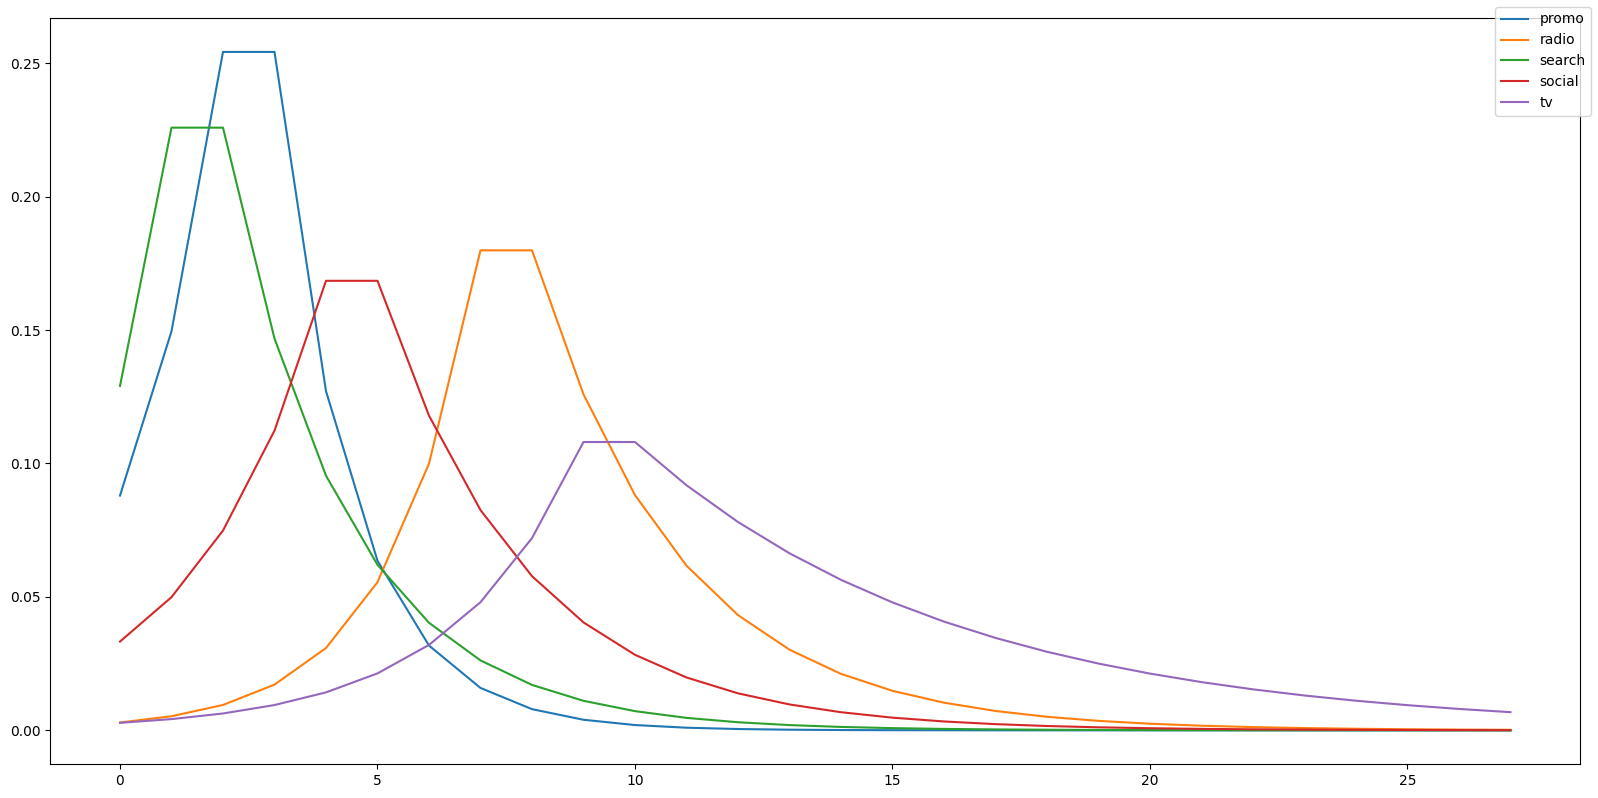

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
for idx, ch in enumerate(channels):
    ax.plot(adstock_matrix[idx], label=ch)
fig.legend()
fig.tight_layout()